In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ERA_data_new.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,ConcertId,OrganizerId,Name_organizer,ConcertName,Venue,ReleaseDate,ReleaseTime,SoldDate,SoldTime,StartSaleDate,ListPrice,SoldPrice,SeatRow,SeatColumn,VenueArea,TotalSeat,Sex,Holiday,Summer_vacation,Winter_vacation,Chinese_performer,NortheastAsian_performer,Western_performer,Individual_performer,Team_performer,Multi_performer
0,16296_2015_06-06_19_30,16296,40373,探索傳播事業(股)公司,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-06-06,19:30,2015-01-29,09:58,2015-01-21,1400,10,055,25,北北基,3044,F,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
1,16296_2015_06-06_19_30,16296,40373,探索傳播事業(股)公司,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-06-06,19:30,2015-01-29,09:58,2015-01-21,1400,10,055,23,北北基,3044,F,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
2,16296_2015_06-06_19_30,16296,40373,探索傳播事業(股)公司,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-06-06,19:30,2015-01-29,09:58,2015-01-21,1400,10,055,21,北北基,3044,F,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
3,16296_2015_06-06_19_30,16296,40373,探索傳播事業(股)公司,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-06-06,19:30,2015-01-29,09:58,2015-01-21,1400,10,055,19,北北基,3044,F,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
4,16296_2015_06-06_19_30,16296,40373,探索傳播事業(股)公司,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-06-06,19:30,2015-01-29,10:00,2015-01-21,1400,10,055,12,北北基,3044,F,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
a=df.groupby(['ConcertId','ReleaseDate','VenueArea','TotalSeat',
              'Holiday','Summer_vacation','Winter_vacation',
              'Chinese_performer','NortheastAsian_performer','Western_performer',
              'Individual_performer','Team_performer','Multi_performer']).size().reset_index().rename(columns={0:'Count'})
dups=a[a.duplicated(['ConcertId'],keep=False)]
dups.shape

(80, 14)

In [ ]:
a["Month"] = pd.DatetimeIndex(a["ReleaseDate"]).month

In [ ]:
month = {"Month": {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}}
#a = a.replace(month)
#a.groupby(a['Month']).size()

In [ ]:
#a.groupby(a['Month']).size()

Month
Apr    11
Aug    12
Dec    27
Feb     3
Jan     8
Jul    12
Jun    21
Mar     6
May    26
Nov    27
Oct    14
Sep     9
dtype: int64

In [ ]:
a.shape

(176, 15)

In [ ]:
a

,ConcertId,ReleaseDate,VenueArea,TotalSeat,Holiday,Summer_vacation,Winter_vacation,Chinese_performer,NortheastAsian_performer,Western_performer,Individual_performer,Team_performer,Multi_performer,Count,Month
0,16258,2015-06-19,北北基,2541,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1892,Jun
1,16260,2015-02-28,北北基,789,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,524,Feb
2,16289,2015-03-18,北北基,2054,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1658,Mar
3,16296,2015-06-06,北北基,3044,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,3039,Jun
4,16296,2015-06-07,北北基,3044,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,3018,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,18623,2017-12-09,桃竹苗,1293,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1039,Dec
172,18623,2017-12-23,雲嘉南,932,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,689,Dec
173,18623,2017-12-24,雲嘉南,932,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,817,Dec
174,18631,2017-12-30,北北基,3165,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,2957,Dec


Text(0.5, 1.0, 'Number of concerts per month')

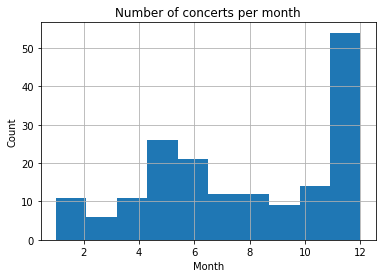

In [ ]:
ax = a['Month'].hist()
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Number of concerts per month')

<BarContainer object of 176 artists>

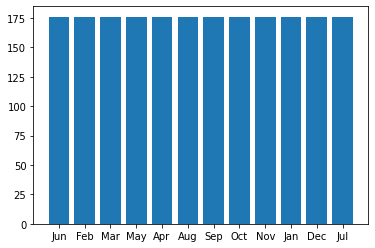

In [ ]:
plt.bar(a["Month"], len(a))

In [ ]:
area = {"VenueArea": {'北北基':"Beibeiji", '中彰投':"Zhongzhangtou", '高屏':"Gaoping", '桃竹苗':"Taozhumiao", '雲嘉南':"Yunjianan", '花東_外島':"Huadong"}}
a = a.replace(area)

Text(0.5, 1.0, 'Number of concerts by different Venuearea')

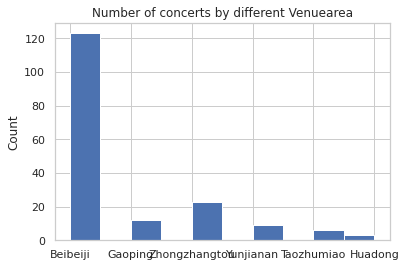

In [ ]:
ax = a["VenueArea"].hist()
#ax.set_xlabel('VenueArea')
ax.set_ylabel('Count')
ax.set_title('Number of concerts by different Venuearea')

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Distribution of concert seats')

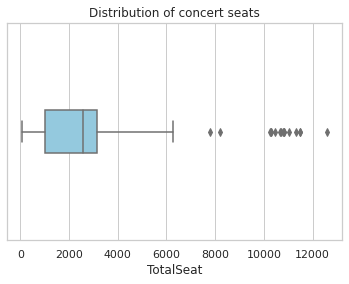

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = a['TotalSeat'], orient = "v", color = "skyblue", width=0.2)  # 畫盒圖
ax.set_title('Distribution of concert seats')
#ax = sns.swarmplot(x = a['TotalSeat'], orient = "v", color = "red")   # 加上資料點

In [ ]:
holiday = a[['Holiday', 'Summer_vacation', 'Winter_vacation']]
nation = a[['Chinese_performer', 'NortheastAsian_performer', 'Western_performer']]
number_of_performers = a[['Individual_performer', 'Team_performer','Multi_performer']]

In [ ]:
holiday['temp']=holiday.eq(1).idxmax(1)
nation['temp']=nation.eq(1).idxmax(1)
number_of_performers['temp']=number_of_performers.eq(1).idxmax(1)


In [ ]:
number_of_performers

,Individual_performer,Team_performer,Multi_performer,temp
0,1.0,0.0,0.0,Individual_performer
1,1.0,0.0,0.0,Individual_performer
2,1.0,0.0,0.0,Individual_performer
3,1.0,0.0,0.0,Individual_performer
4,1.0,0.0,0.0,Individual_performer
...,...,...,...,...
171,1.0,0.0,0.0,Individual_performer
172,1.0,0.0,0.0,Individual_performer
173,1.0,0.0,0.0,Individual_performer
174,1.0,0.0,0.0,Individual_performer


In [ ]:
a['Holiday'].value_counts()

0    156
1     20
Name: Holiday, dtype: int64

Text(0.5, 1.0, 'Number of concerts')

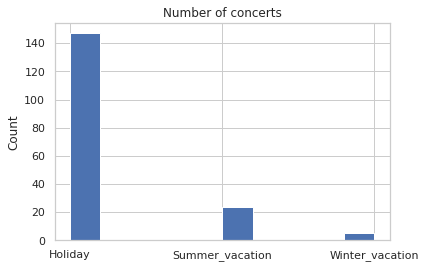

In [ ]:
ax = holiday["temp"].hist()
#ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Number of concerts')

Text(0.5, 1.0, 'Number of concerts')

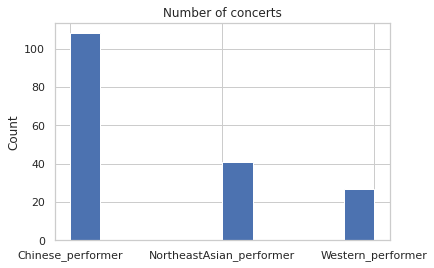

In [ ]:
ax = nation["temp"].hist()
#ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Number of concerts')

Text(0.5, 1.0, 'Number of concerts')

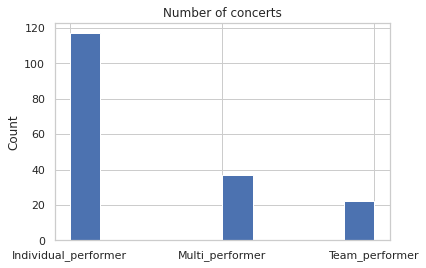

In [ ]:
ax = number_of_performers["temp"].hist()
#ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Number of concerts')

In [ ]:
df = df.drop(columns = ["id", "OrganizerId", "Name_organizer", "SeatRow","SeatColumn","Chinese_performer","Western_performer",
                        "Individual_performer","Team_performer","Multi_performer", "NortheastAsian_performer"])

gender = {"Sex": {"F": 0, "M": 1}}
area = {"VenueArea": {"北北基": 1, "中彰投": 2, "高屏": 3, "桃竹苗": 4, "雲嘉南": 5, "花東_外島": 6}}

df = df.replace(gender)
df = df.replace(area)

df['ReleaseDateTime'] = pd.to_datetime(df['ReleaseDate'] + ' ' + df['ReleaseTime'])
df['SoldDateTime'] = pd.to_datetime(df['SoldDate'] + ' ' + df['SoldTime'])

df = df.drop(columns = ["ReleaseDate", "ReleaseTime", "SoldDate", "SoldTime"])

#df = pd.get_dummies(df, columns = ['VenueArea'])


In [ ]:
df.head()

,ConcertId,ConcertName,Venue,StartSaleDate,ListPrice,SoldPrice,TotalSeat,Sex,Holiday,Summer_vacation,Winter_vacation,ReleaseDateTime,SoldDateTime,VenueArea_1,VenueArea_2,VenueArea_3,VenueArea_4,VenueArea_5,VenueArea_6
0,16296,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-01-21,1400,10,3044,0,0,0,0,2015-06-06 19:30:00,2015-01-29 09:58:00,1,0,0,0,0,0
1,16296,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-01-21,1400,10,3044,0,0,0,0,2015-06-06 19:30:00,2015-01-29 09:58:00,1,0,0,0,0,0
2,16296,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-01-21,1400,10,3044,0,0,0,0,2015-06-06 19:30:00,2015-01-29 09:58:00,1,0,0,0,0,0
3,16296,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-01-21,1400,10,3044,0,0,0,0,2015-06-06 19:30:00,2015-01-29 09:58:00,1,0,0,0,0,0
4,16296,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-01-21,1400,10,3044,0,0,0,0,2015-06-06 19:30:00,2015-01-29 10:00:00,1,0,0,0,0,0


In [ ]:
df["ListPrice"].value_counts()

2000    35234
2800    33268
1800    31073
1200    25954
2500    24625
        ...  
1840       12
1250       10
1100       10
2750        5
1650        2
Name: ListPrice, Length: 75, dtype: int64

In [ ]:
#df = df.sort_values(by = ['StartSaleDate', 'SoldDate', 'SoldTime']).reset_index(drop = True)
#df = df.sort_values(by = ["ConcertId"]).reset_index(drop = True)

In [ ]:
df.head()

,id,ConcertId,OrganizerId,Name_organizer,ConcertName,Venue,ReleaseDate,ReleaseTime,SoldDate,SoldTime,StartSaleDate,ListPrice,SoldPrice,SeatRow,SeatColumn,VenueArea,TotalSeat,Sex,Holiday,Summer_vacation,Winter_vacation,Chinese_performer,NortheastAsian_performer,Western_performer,Individual_performer,Team_performer,Multi_performer,ReleaseDateTime,SoldDateTime
0,16296_2015_06-06_19_30,16296,40373,探索傳播事業(股)公司,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-06-06,19:30,2015-01-29,09:58,2015-01-21,1400,10,055,25,北北基,3044,F,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,2015-06-06 19:30:00,2015-01-29 09:58:00
1,16296_2015_06-06_19_30,16296,40373,探索傳播事業(股)公司,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-06-06,19:30,2015-01-29,09:58,2015-01-21,1400,10,055,23,北北基,3044,F,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,2015-06-06 19:30:00,2015-01-29 09:58:00
2,16296_2015_06-06_19_30,16296,40373,探索傳播事業(股)公司,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-06-06,19:30,2015-01-29,09:58,2015-01-21,1400,10,055,21,北北基,3044,F,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,2015-06-06 19:30:00,2015-01-29 09:58:00
3,16296_2015_06-06_19_30,16296,40373,探索傳播事業(股)公司,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-06-06,19:30,2015-01-29,09:58,2015-01-21,1400,10,055,19,北北基,3044,F,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,2015-06-06 19:30:00,2015-01-29 09:58:00
4,16296_2015_06-06_19_30,16296,40373,探索傳播事業(股)公司,2015李翊君_夢想.情歌.演唱會,台北國際會議中心大會堂,2015-06-06,19:30,2015-01-29,10:00,2015-01-21,1400,10,055,12,北北基,3044,F,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,2015-06-06 19:30:00,2015-01-29 10:00:00


In [ ]:
df.shape

(425088, 18)

In [ ]:
df.groupby(by = ['ConcertName', 'ReleaseDateTime'])["Venue"].value_counts()

ConcertName                                            ReleaseDateTime      Venue             
2015[世紀巨星風華絕代]金曲演唱會                                    2015-08-14 19:30:00  台北國際會議中心大會堂           1219
                                                       2015-08-15 19:30:00  台北國際會議中心大會堂           1465
2015_TOKU_Live_Concert_in_Taipei-日本爵士巨擘TOKU-2015台北演唱會  2015-11-26 19:30:00  NeoStudio               49
2015八代亞紀"台灣你好"夏日金曲演唱會                                  2015-06-28 19:30:00  台北國際會議中心大會堂           2783
2015懷念歌廳秀巡迴演出                                          2015-05-09 19:00:00  高雄市勞工教育生活中心澄清會館演藝廳    1796
                                                                                                  ... 
饒夢霞_如歌人生2016愛您一路公益說唱會                                  2016-12-16 19:00:00  成功大學-成功廳               618
                                                       2016-12-17 14:00:00  國立台灣體育運動大學(台中)-中興堂     492
黃玠[關於那些記得的事]巡迴演唱會-台中場                                  2016-11-26 20:00:00  Legac

In [ ]:
df["Venue"].value_counts()

台北國際會議中心大會堂           107407
台北小巨蛋                  95989
高雄巨蛋                   39581
台中市中興大學惠蓀堂             35043
台北國父紀念館                22010
國立台灣大學綜合體育館            20725
台北國家音樂廳                13632
桃園巨蛋                    9081
苗栗巨蛋體育館                 7532
成功大學-中正堂                7366
嘉義港坪體育館                 6034
新北市工商展覽中心               5681
台中圓滿戶外劇場                5494
國立台灣體育運動大學(台中)-田徑場      4817
ATT_SHOW_BOX            3856
花蓮縣立體育館                 3804
基隆文化中心演藝廳               3787
高雄市勞工教育生活中心澄清會館演藝廳      3596
OMNI                    3402
新北市政府多功能集會堂             2309
金門金湖體育館                 2220
成功大學-成功廳                2124
台北小巨蛋_包廂                1804
臺中國家歌劇院大劇院              1739
高雄市文化中心至德堂              1628
LegacyTaichung          1563
雲林科技大學大禮堂               1351
中油國光廳                   1197
桃園展演中心展演廳               1039
屏東演藝廳[音樂廳]              1002
花漾HANA展演空間               933
台北中山堂中正廳                 910
桃園展演中心                   815
臺北市政府親子劇場                800
The_Wall這牆音樂藝文

In [ ]:
df["VenueArea"].value_counts()

北北基      287199
中彰投       49850
高屏        46195
桃竹苗       18467
雲嘉南       17353
花東_外島      6024
Name: VenueArea, dtype: int64

In [ ]:
b = df.groupby(by = ['ConcertName', 'ReleaseDateTime'])

In [ ]:
temp = b.count().sort_values(by = ['ConcertId'],ascending=False)
temp

,,ConcertId,Venue,StartSaleDate,ListPrice,SoldPrice,VenueArea,TotalSeat,Sex,Holiday,Summer_vacation,Winter_vacation,SoldDateTime
ConcertName,ReleaseDateTime,,,,,,,,,,,,
NISSAN超玩美之夜_越愛越勇敢_彭佳慧2015台北小巨蛋演唱會,2015-06-20 19:30:00,11219,11219,11219,11219,11219,11219,11219,11219,11219,11219,11219,11219
留住你我的故事-黃鶯鶯2015臺北小巨蛋演唱會,2015-05-16 19:30:00,11198,11198,11198,11198,11198,11198,11198,11198,11198,11198,11198,11198
遇恆_牽情_姜育恆2015全球巡迴演唱會,2015-11-28 19:30:00,11011,11011,11011,11011,11011,11011,11011,11011,11011,11011,11011,11011
林志炫ONEtake世界巡迴演唱會-台北站,2016-11-05 19:30:00,10781,10781,10781,10781,10781,10781,10781,10781,10781,10781,10781,10781
留住你我的故事-黃鶯鶯2015臺北小巨蛋演唱會,2015-05-17 19:30:00,10450,10450,10450,10450,10450,10450,10450,10450,10450,10450,10450,10450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015格蘭利威Glenlivet-Mike_Candys_Taipei_Live_Show,2015-11-21 22:00:00,47,47,47,47,47,47,47,47,47,47,47,47
[眾聲喧囂]Triple_Deer同名EP發片巡迴演出,2015-08-09 19:00:00,45,45,45,45,45,45,45,45,45,45,45,45
Afilia_Saga_Premium-One_man_Live_2016-in台灣,2016-07-09 18:30:00,28,28,28,28,28,28,28,28,28,28,28,28


In [ ]:
temp = temp[["ConcertId"]]

number_visitors = temp.rename(columns = {"ConcertId": "count_visitors"}, inplace = False)
number_visitors

,,count_visitors
ConcertName,ReleaseDateTime,
NISSAN超玩美之夜_越愛越勇敢_彭佳慧2015台北小巨蛋演唱會,2015-06-20 19:30:00,11219
留住你我的故事-黃鶯鶯2015臺北小巨蛋演唱會,2015-05-16 19:30:00,11198
遇恆_牽情_姜育恆2015全球巡迴演唱會,2015-11-28 19:30:00,11011
林志炫ONEtake世界巡迴演唱會-台北站,2016-11-05 19:30:00,10781
留住你我的故事-黃鶯鶯2015臺北小巨蛋演唱會,2015-05-17 19:30:00,10450
...,...,...
2015格蘭利威Glenlivet-Mike_Candys_Taipei_Live_Show,2015-11-21 22:00:00,47
[眾聲喧囂]Triple_Deer同名EP發片巡迴演出,2015-08-09 19:00:00,45
Afilia_Saga_Premium-One_man_Live_2016-in台灣,2016-07-09 18:30:00,28


In [ ]:
concert_info = b.describe().sort_values(by = ['ConcertName', 'ReleaseDateTime'],ascending=False)

In [ ]:
concert_info

ConcertId  ... Winter_vacation
                                                                           count  ...             max
ConcertName                                        ReleaseDateTime                ...                
齋賀光希+阿部敦_W_Event_in_Taiwan                         2017-01-22 17:00:00     113.0  ...             1.0
黃貫中英雄有分數演唱會                                        2016-04-30 19:30:00    1029.0  ...             0.0
黃玠[關於那些記得的事]巡迴演唱會-台中場                              2016-11-26 20:00:00     422.0  ...             0.0
饒夢霞_如歌人生2016愛您一路公益說唱會                              2016-12-17 14:00:00     492.0  ...             0.0
                                                   2016-12-16 19:00:00     618.0  ...             0.0
...                                                                          ...  ...             ...
2015懷念歌廳秀巡迴演出                                      2015-05-09 19:00:00    1796.0  ...             0.0
2015八代亞紀"台灣你好"夏日金曲演唱會                              2015-06-28 19:30:00    2783.0  ...             0.0
2015_TOKU_Live_Concert_in_Taipei-日本爵士巨擘TOKU-201... 2015-11-26 19:30:00      49.0  ...             0.0
2015[世紀巨星風華絕代]金曲演唱會                                2015-08-15 19:30:00    1465.0  ...             0.0
                                                   2015-08-14 19:30:00    1219.0  ...             0.0

[180 rows x 72 columns]

# Rename columns

In [ ]:
data = pd.merge(concert_info["ConcertId"]["mean"], number_visitors, how = 'inner', on = ['ConcertName', 'ReleaseDateTime'])
data = data.rename(columns = {"mean": "ConcertId"}, inplace = False)

In [ ]:
data = pd.merge(concert_info["ListPrice"]["min"], data, how = 'inner', on = ['ConcertName', 'ReleaseDateTime'])

In [ ]:
data = data.rename(columns = {"min": "ListPriceMin"}, inplace = False)

In [ ]:
data = pd.merge(concert_info["ListPrice"]["max"], data, how = 'inner', on = ['ConcertName', 'ReleaseDateTime'])

In [ ]:
data = data.rename(columns = {"max": "ListPriceMax"}, inplace = False)

In [ ]:
data = pd.merge(concert_info["SoldPrice"]["min"], data, how = 'inner', on = ['ConcertName', 'ReleaseDateTime'])
data = pd.merge(concert_info["SoldPrice"]["max"], data, how = 'inner', on = ['ConcertName', 'ReleaseDateTime'])

In [ ]:
data = data.rename(columns = {"min": "SoldPriceMin"}, inplace = False)
data = data.rename(columns = {"max": "SoldPriceMax"}, inplace = False)

In [ ]:
data = pd.merge(concert_info["TotalSeat"]["mean"], data, how = 'inner', on = ['ConcertName', 'ReleaseDateTime'])

In [ ]:
data = data.rename(columns = {"mean": "TotalSeat"}, inplace = False)

In [ ]:
data = pd.merge(concert_info["Sex"]["mean"], data, how = 'inner', on = ['ConcertName', 'ReleaseDateTime'])

In [ ]:
data = data.rename(columns = {"mean": "SexRatio"}, inplace = False)

In [ ]:
data = pd.merge(concert_info["Holiday"]["mean"], data, how = 'inner', on = ['ConcertName', 'ReleaseDateTime'])

In [ ]:
data = data.rename(columns = {"mean": "Holiday"}, inplace = False)

In [ ]:
data = pd.merge(concert_info["Summer_vacation"]["mean"], data, how = 'inner', on = ['ConcertName', 'ReleaseDateTime'])

In [ ]:
data = data.rename(columns = {"mean": "Summer_vacation"}, inplace = False)

In [ ]:
data = pd.merge(concert_info["Winter_vacation"]["mean"], data, how = 'inner', on = ['ConcertName', 'ReleaseDateTime'])

In [ ]:
data = data.rename(columns = {"mean": "Winter_vacation"}, inplace = False)

In [ ]:
data = pd.merge(concert_info["VenueArea"]["mean"], data, how = 'inner', on = ['ConcertName', 'ReleaseDateTime'])

In [ ]:
data = data.rename(columns = {"mean": "VenueArea"}, inplace = False)

# Prepare training&testing dataset 

In [ ]:
data

VenueArea  ...  count_visitors
ConcertName                                        ReleaseDateTime                 ...                
齋賀光希+阿部敦_W_Event_in_Taiwan                         2017-01-22 17:00:00        1.0  ...             113
黃貫中英雄有分數演唱會                                        2016-04-30 19:30:00        1.0  ...            1029
黃玠[關於那些記得的事]巡迴演唱會-台中場                              2016-11-26 20:00:00        2.0  ...             422
饒夢霞_如歌人生2016愛您一路公益說唱會                              2016-12-17 14:00:00        2.0  ...             492
                                                   2016-12-16 19:00:00        5.0  ...             618
...                                                                           ...  ...             ...
2015懷念歌廳秀巡迴演出                                      2015-05-09 19:00:00        3.0  ...            1796
2015八代亞紀"台灣你好"夏日金曲演唱會                              2015-06-28 19:30:00        1.0  ...            2783
2015_TOKU_Live_Concert_in_Taipei-日本爵士巨擘TOKU-201... 2015-11-26 19:30:00        1.0  ...              49
2015[世紀巨星風華絕代]金曲演唱會                                2015-08-15 19:30:00        1.0  ...            1465
                                                   2015-08-14 19:30:00        1.0  ...            1219

[180 rows x 12 columns]

In [ ]:
data = pd.get_dummies(data, columns = ['VenueArea'])
data["SalesRatio"] = data["count_visitors"] / data["TotalSeat"]
data = data.reset_index(drop = True)
data = data.drop(columns = ["TotalSeat", "ConcertId"])

In [ ]:
data

,VenueArea,Winter_vacation,Summer_vacation,Holiday,SexRatio,SoldPriceMax,SoldPriceMin,ListPriceMax,ListPriceMin,count_visitors,SalesRatio
0,1.0,1.0,0.0,0.0,0.053097,2500.0,900.0,2500.0,900.0,113,0.246187
1,1.0,0.0,0.0,0.0,0.140914,3800.0,0.0,3800.0,1800.0,1029,0.328754
2,2.0,0.0,0.0,0.0,0.215640,1000.0,500.0,1000.0,500.0,422,0.875519
3,2.0,0.0,0.0,0.0,0.034553,1200.0,0.0,1200.0,10.0,492,0.399351
4,5.0,0.0,0.0,0.0,0.009709,1200.0,0.0,1200.0,10.0,618,0.660256
...,...,...,...,...,...,...,...,...,...,...,...
175,3.0,0.0,0.0,0.0,0.036748,2800.0,0.0,2800.0,800.0,1796,0.997778
176,1.0,0.0,0.0,0.0,0.078333,4800.0,0.0,4800.0,1200.0,2783,0.890275
177,1.0,0.0,0.0,0.0,0.102041,2000.0,2000.0,2000.0,2000.0,49,0.245000
178,1.0,0.0,1.0,0.0,0.088055,4680.0,0.0,4680.0,10.0,1465,0.468201


In [ ]:
area = {"VenueArea": {1:"Beibeiji", 2:"Zhongzhangtou", 3:"Gaoping", 4:"Taozhumiao", 5:"Yunjianan", 6:"Huadong"}}
plot_data = data.replace(area)

In [ ]:
plot_data["VenueArea"].value_counts()

Beibeiji         127
Zhongzhangtou     23
Gaoping           12
Yunjianan          9
Taozhumiao         6
Huadong            3
Name: VenueArea, dtype: int64

In [ ]:
plot_data['Q1_all'] = (plot_data.iloc[:, 1:4] == 1).idxmax(1)


In [ ]:
import seaborn as sns


In [ ]:
print(pd.crosstab(plot_data['Winter_vacation'],plot_data['Summer_vacation'],margins=True))

Summer_vacation  0.0  1.0  All
Winter_vacation               
0.0              149   24  173
1.0                7    0    7
All              156   24  180


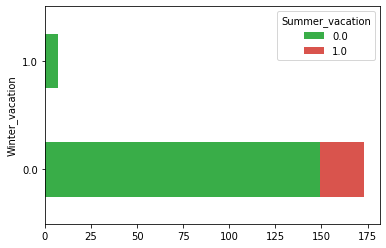

In [ ]:
cross_tab_Q1_group = pd.crosstab([plot_data.Winter_vacation], [plot_data.Summer_vacation])
cross_tab_Q1_group.plot(kind="barh", stacked=True, color=[sns.xkcd_rgb['medium green'], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"]])

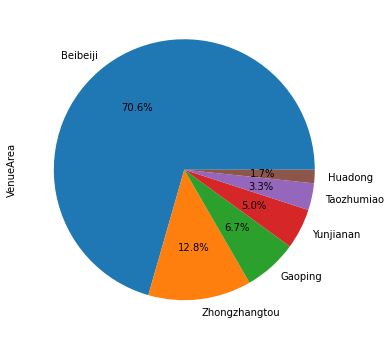

In [ ]:
plot_data["VenueArea"].value_counts().plot.pie(autopct='%1.1f%%', fontsize=10, figsize=(6, 6))

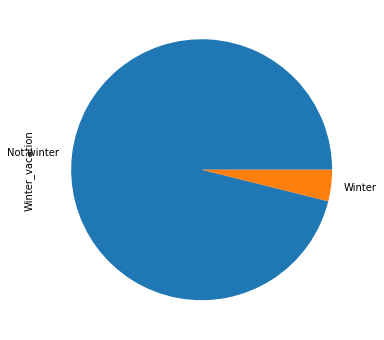

In [ ]:
plot_data["Winter_vacation"].value_counts().plot.pie(labels = ['Not winter', 'Winter'], fontsize=10, figsize=(6, 6))

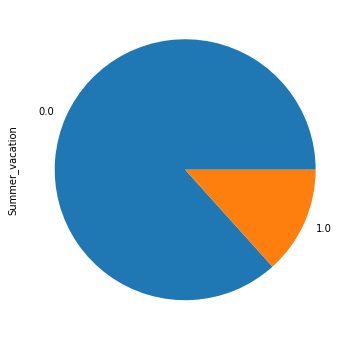

In [ ]:
plot_data["Summer_vacation"].value_counts().plot.pie(fontsize=10, figsize=(6, 6))

In [ ]:
X = data.drop(columns = ["SalesRatio"])
y = data[["SalesRatio"]]

In [ ]:
X.head()

,Winter_vacation,Summer_vacation,Holiday,SexRatio,SoldPriceMax,SoldPriceMin,ListPriceMax,ListPriceMin,count_visitors,VenueArea_1.0,VenueArea_2.0,VenueArea_3.0,VenueArea_4.0,VenueArea_5.0,VenueArea_6.0
0,1.0,0.0,0.0,0.053097,2500.0,900.0,2500.0,900.0,113,1,0,0,0,0,0
1,0.0,0.0,0.0,0.140914,3800.0,0.0,3800.0,1800.0,1029,1,0,0,0,0,0
2,0.0,0.0,0.0,0.215640,1000.0,500.0,1000.0,500.0,422,0,1,0,0,0,0
3,0.0,0.0,0.0,0.034553,1200.0,0.0,1200.0,10.0,492,0,1,0,0,0,0
4,0.0,0.0,0.0,0.009709,1200.0,0.0,1200.0,10.0,618,0,0,0,0,1,0


In [ ]:
y.head()

,SalesRatio
0,0.246187
1,0.328754
2,0.875519
3,0.399351
4,0.660256


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#from sklearn.svm import SVM
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
#from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression


In [ ]:
result = {}
models = [
    RandomForestRegressor(),
    AdaBoostRegressor(),
    LinearRegression()]
models_name = ["RF", "Adaboost", "LinearRegression"]

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
for i,model in enumerate(models):
    print("%s Model fitting......"%models_name[i])
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    result[models_name[i]] = {}
    result[models_name[i]]["accuracy_training"] = r2_score(y_train, y_train_pred)
    result[models_name[i]]["accuracy_testing"] = r2_score(y_test, y_test_pred)
    result[models_name[i]]["cross_val_score_training"] = cross_val_score(model, y_train, y_train_pred, cv=5).mean()
    result[models_name[i]]["cross_val_score_testing"] = cross_val_score(model, y_test, y_test_pred, cv=5).mean()


RF Model fitting......


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Adaboost Model fitting......


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression Model fitting......


In [ ]:
pd.DataFrame(result)

,RF,Adaboost,LinearRegression
accuracy_training,0.933230,0.782942,0.376951
accuracy_testing,0.493532,0.396233,0.129239
cross_val_score_training,0.925630,0.879414,0.353401
cross_val_score_testing,-0.019734,0.041446,0.025918
